**MULHERES NO MUNDO DOS NEGÓCIOS: UMA ANÁLISE DOS DADOS DE 2015 NA OCDE**

**Introdução**

O presente conjunto de dados representa uma valiosa fonte de informações, oriundas do relatório do Índice de Empreendedorismo Feminino e do Índice de Empreendedorismo Global publicado em 2015. Esses dados foram minuciosamente coletados e disponibilizados através da plataforma Kaggle, acessível no link: https://www.kaggle.com/datasets/babyoda/women-entrepreneurship-and-labor-force?rvi=1.

Este estudo se concentra especificamente nos países membros da OCDE (Organização para a Cooperação e Desenvolvimento Econômico), onde todos os dados referentes ao ano de 2015 estão simultaneamente disponíveis na base de dados. A OCDE compreende uma seleção de nações comprometidas com o desenvolvimento econômico e social, o que torna esses dados especialmente relevantes para a análise do empreendedorismo feminino e força de trabalho nesses países durante o ano de referência.

Através dessa análise, exploraremos uma variedade de indicadores e métricas que lançam luz sobre o papel das mulheres no empreendedorismo e no mercado de trabalho, fornecendo insights valiosos que podem auxiliar na compreensão e promoção da igualdade de gênero e do empreendedorismo nos países da OCDE no ano de 2015.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("female_entrepreneurship.csv", sep=";" , encoding= 'UTF-8')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 9 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Number                                 51 non-null     int64  
 1   Country                                51 non-null     object 
 2   Level of development                   51 non-null     object 
 3   European Union Membership              51 non-null     object 
 4   Currency                               51 non-null     object 
 5   Women Entrepreneurship Index           51 non-null     float64
 6   Entrepreneurship Index                 51 non-null     float64
 7   Inflation rate                         51 non-null     float64
 8   Female Labor Force Participation Rate  51 non-null     float64
dtypes: float64(4), int64(1), object(4)
memory usage: 3.7+ KB


In [6]:
df.head(3)

,Number,Country,Level of development,European Union Membership,Currency,Women Entrepreneurship Index,Entrepreneurship Index,Inflation rate,Female Labor Force Participation Rate
0,4,Austria,Developed,Member,Euro,54.9,64.9,0.90,67.1
1,6,Belgium,Developed,Member,Euro,63.6,65.5,0.60,58.0
2,17,Estonia,Developed,Member,Euro,55.4,60.2,-0.88,68.5


---------------------------------------------------------------------------------------------------------

**HIPÓTESES**

**Hipótese 1 (H1):** Existe uma correlação positiva significativa entre o Índice de Empreendedorismo Feminino e o Índice de Empreendedorismo em países desenvolvidos membros da OCDE.

**Hipótese 2 (H2):** Países desenvolvidos têm um Índice de Empreendedorismo Feminino significativamente mais alto do que países em desenvolvimento.

------------------------------------------------------------------------------------------------------

**PERGUNTAS A SEREM RESPONDIDAS**

**Pergunta 1 (P1):** Quais são os países com os maiores e menores níveis de empreendedorismo feminino na OCDE em 2015?

**Pergunta 2 (P2):** Como o Índice de Empreendedorismo Feminino se correlaciona com o Índice de Empreendedorismo em países membros e não membros da OCDE?

**Pergunta 3 (P3):** Existe uma tendência visível entre o desenvolvimento de um país e seu Índice de Empreendedorismo Feminino?

-------------------------------------------------------------------------------------------------------

**PROCESSAMENTO DOS DADOS**

In [23]:
def preprocess_data(file_path):
    df = pd.read_csv(file_path, sep=";", encoding="UTF-8")

    # Filtrando apenas as colunas necessárias
    df = df[['Country', 'Level of development', 'Women Entrepreneurship Index', 'Entrepreneurship Index', 'European Union Membership']]

    df.dropna(inplace=True)

    return df

df = preprocess_data("female_entrepreneurship.csv")
df.head(3)

,Country,Level of development,Women Entrepreneurship Index,Entrepreneurship Index,European Union Membership
0,Austria,Developed,54.9,64.9,Member
1,Belgium,Developed,63.6,65.5,Member
2,Estonia,Developed,55.4,60.2,Member


-------------------------------------------------------------------------------------------------------------

**P1**

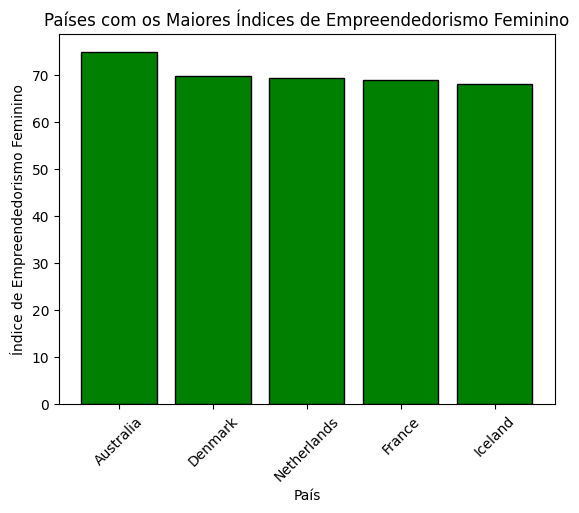

In [16]:
top_countries = df[df['Level of development'] == 'Developed'].nlargest(5, 'Women Entrepreneurship Index')

plt.bar(top_countries['Country'], top_countries['Women Entrepreneurship Index'], color='green', edgecolor='black')
plt.xlabel('País')
plt.ylabel('Índice de Empreendedorismo Feminino')
plt.title('Países com os Maiores Índices de Empreendedorismo Feminino')
plt.xticks(rotation=45)
plt.show()

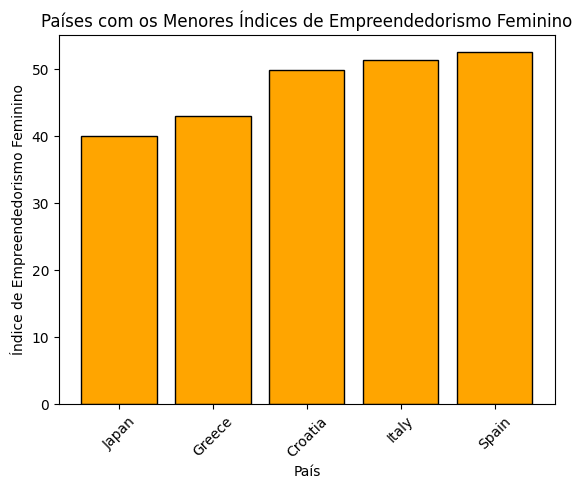

In [17]:
bottom_countries = df[df['Level of development'] == 'Developed'].nsmallest(5, 'Women Entrepreneurship Index')

plt.bar(bottom_countries['Country'], bottom_countries['Women Entrepreneurship Index'], color='orange', edgecolor='black')
plt.xlabel('País')
plt.ylabel('Índice de Empreendedorismo Feminino')
plt.title('Países com os Menores Índices de Empreendedorismo Feminino')
plt.xticks(rotation=45)
plt.show()

Pode-se observar que tanto os países que têm os maiores índices de empreendedorismo feminino como os menores estão entre os países classificados como "Desenvolvidos". Neste caso o desenvolvimento econômico, apesar de ser um dado importante, não é um fator determinante na atuação das mulheres nos negócios, são necessários dados adicionais para pensar essa questão, para responder perguntas como: qual a política de estímulo ao empreendedorismo feminino nos países com índices mais baixos?

---------------------------------------------------------------------------------------------------------------

**P2** / **H1**

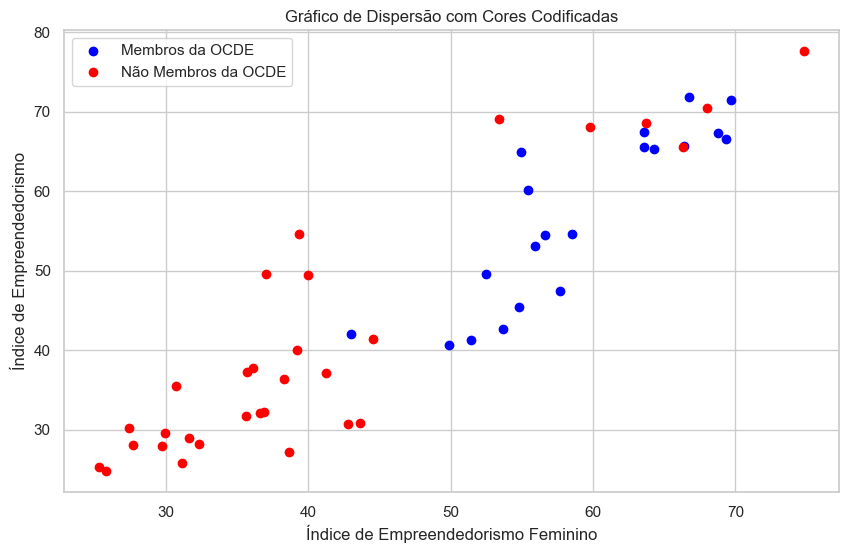

In [42]:
ocde_df = df[df['European Union Membership'] == 'Member']
non_ocde_df = df[df['European Union Membership'] == 'Not Member']

plt.figure(figsize=(10, 6))
plt.scatter(ocde_df['Women Entrepreneurship Index'], ocde_df['Entrepreneurship Index'], c='blue', label='Membros da OCDE')
plt.scatter(non_ocde_df['Women Entrepreneurship Index'], non_ocde_df['Entrepreneurship Index'], c='red', label='Não Membros da OCDE')
plt.xlabel('Índice de Empreendedorismo Feminino')
plt.ylabel('Índice de Empreendedorismo')
plt.title('Gráfico de Dispersão com Cores Codificadas')
plt.legend()
plt.show()

O gráfico de dispersão com cores codificadas sugere que países membros da OCDE (em azul) tendem a ter índices de empreendedorismo feminino mais altos em comparação com países não membros (em vermelho). Isso pode indicar que a filiação à OCDE está associada a um ambiente mais favorável para o empreendedorismo feminino.

------------------------------------------------------------------------------------------------------

**P3** / **H2**

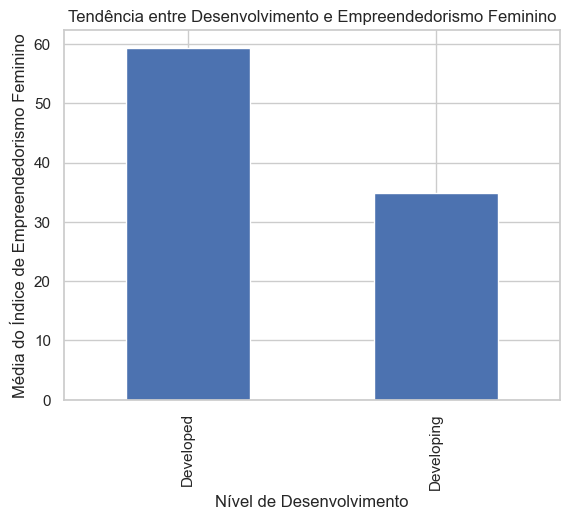

In [40]:
avg_women_entrepreneurship = df.groupby('Level of development')['Women Entrepreneurship Index'].mean()
avg_women_entrepreneurship.plot(kind='bar')
plt.xlabel('Nível de Desenvolvimento')
plt.ylabel('Média do Índice de Empreendedorismo Feminino')
plt.title('Tendência entre Desenvolvimento e Empreendedorismo Feminino')
plt.show()

O gráfico de barras que mostra a média do Índice de Empreendedorismo Feminino por nível de desenvolvimento sugere que países desenvolvidos tendem a ter uma média mais alta. Essa análise apoia a ideia de que o nível de desenvolvimento está positivamente correlacionado com o empreendedorismo feminino, apesar de não ser o fator determinante.

--------------------------------------------------------------------------------------------------------

**INSIGHTS**


1. Países desenvolvidos tendem a oferecer um ambiente mais propício para o empreendedorismo feminino, com índices mais altos.

2. Filiação à OCDE pode estar associada a índices de empreendedorismo feminino mais altos.

3. Existem diferenças significativas nos índices de empreendedorismo feminino entre países, destacando a importância de políticas e iniciativas para promover o empreendedorismo feminino em nível global.

4. O desenvolvimento econômico parece ter uma influência positiva no empreendedorismo feminino, mas outros fatores também podem estar em jogo.